### 数据准备

In [2]:
!pip install heatmapz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Inspect data for weird values
data = pd.read_csv("./data.csv")

for col in data.columns:

  df = data[col].value_counts()
  df = df.sort_index()

  print("COLUMN: ", col, "\n")
  print(df.head(5))
  print(df.tail(5))

  print("-"*10)

data.info()

COLUMN:  PID 

100051501    1
100051502    1
100160601    1
100376551    1
100551551    1
Name: PID, dtype: int64
2350241551    1
2350241552    1
2371541601    1
2489151501    1
2489151502    1
Name: PID, dtype: int64
----------
COLUMN:  cyear 

2018    22942
2019      696
Name: cyear, dtype: int64
2018    22942
2019      696
Name: cyear, dtype: int64
----------
COLUMN:  IBIRTHY 

1922    1
1925    3
1926    1
1927    1
1929    4
Name: IBIRTHY, dtype: int64
1998    31
1999    16
2000     8
2001     5
2002     4
Name: IBIRTHY, dtype: int64
----------
COLUMN:  AGE 

16     4
17     5
18     8
19    15
20    28
Name: AGE, dtype: int64
89    4
91    1
92    1
93    3
96    1
Name: AGE, dtype: int64
----------
COLUMN:  Sex 

0    12020
1    11618
Name: Sex, dtype: int64
0    12020
1    11618
Name: Sex, dtype: int64
----------
COLUMN:  Education 

-1       1
 0    5411
 3    5264
 4    7178
 5    3315
Name: Education, dtype: int64
5    3315
6    1415
7     976
8      73
9       5
Name: Educa

In [5]:
data = pd.read_csv("./data.csv")

# Marriage 没有意义
data.drop("Marriage",axis=1, inplace=True)

# 调查指示人们填写-8为NaN ; 好像一些人也填写了-1和-2
for col in data:
  data.loc[data[col] < 0, col] = np.nan

# <10 不可能 (其实<20在中国不能结婚，但可能有一些以外的）& >1000也不可能
data.loc[data.SpouseAge < 10, 'SpouseAge'] = np.nan
data.loc[data.SpouseAge > 1000, 'SpouseAge'] = np.nan

# 一些人写错了
data.loc[data.MarryLast > 1000, 'MarryLast'] = np.nan

# 根据问卷，满意度是从1.0到5.0
# "... 1 表示很不满意，5 表示非常满意 ..."
data.loc[data.Marriage_stf < 1, 'Marriage_stf'] = np.nan
data.loc[data.Economy_contrb_stf < 1, 'Economy_contrb_stf'] = np.nan
data.loc[data.Housework_contrb_stf < 1, 'Housework_contrb_stf'] = np.nan
data.loc[data.Life_stf < 1, 'Life_stf'] = np.nan
data.loc[data.General_stf < 1, 'General_stf'] = np.nan

In [337]:
for col in data.columns:

  df = data[col].value_counts()
  df = df.sort_index()

  print("COLUMN: ", col, "\n")
  print(df.head(5))
  print(df.tail(5))

  print("-"*10)

data.info()

COLUMN:  PID 

100051501.0    1
100051502.0    1
100160601.0    1
100376551.0    1
100551551.0    1
Name: PID, dtype: int64
2.350242e+09    1
2.350242e+09    1
2.371542e+09    1
2.489152e+09    1
2.489152e+09    1
Name: PID, dtype: int64
----------
COLUMN:  cyear 

2018.0    22942
2019.0      696
Name: cyear, dtype: int64
2018.0    22942
2019.0      696
Name: cyear, dtype: int64
----------
COLUMN:  IBIRTHY 

1922.0    1
1925.0    3
1926.0    1
1927.0    1
1929.0    4
Name: IBIRTHY, dtype: int64
1998.0    31
1999.0    16
2000.0     8
2001.0     5
2002.0     4
Name: IBIRTHY, dtype: int64
----------
COLUMN:  AGE 

16.0     4
17.0     5
18.0     8
19.0    15
20.0    28
Name: AGE, dtype: int64
89.0    4
91.0    1
92.0    1
93.0    3
96.0    1
Name: AGE, dtype: int64
----------
COLUMN:  Sex 

0.0    12020
1.0    11618
Name: Sex, dtype: int64
0.0    12020
1.0    11618
Name: Sex, dtype: int64
----------
COLUMN:  Education 

0.0    5411
3.0    5264
4.0    7178
5.0    3315
6.0    1415
Name: Educ

### EDA

##### 数据类型


Categorical
 * Nominal: Sex, MeetWay, Cohabitation, FirstMarry, Job_code
 * Ordinal: Education, SpouseEducation

Numerical:
 * Continuous: cyear, IBIRTHY, AGE, SpouseAge, MarryLast, Jiazhuang, Income_month, Income, General_stf
 * Discrete: PID, Marriage_stf, Economy_contrb_stf, Life_stf

#### All Variables

##### Distribution

是否有任何奇怪的分布？

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd11b851410>,
      dtype=object)

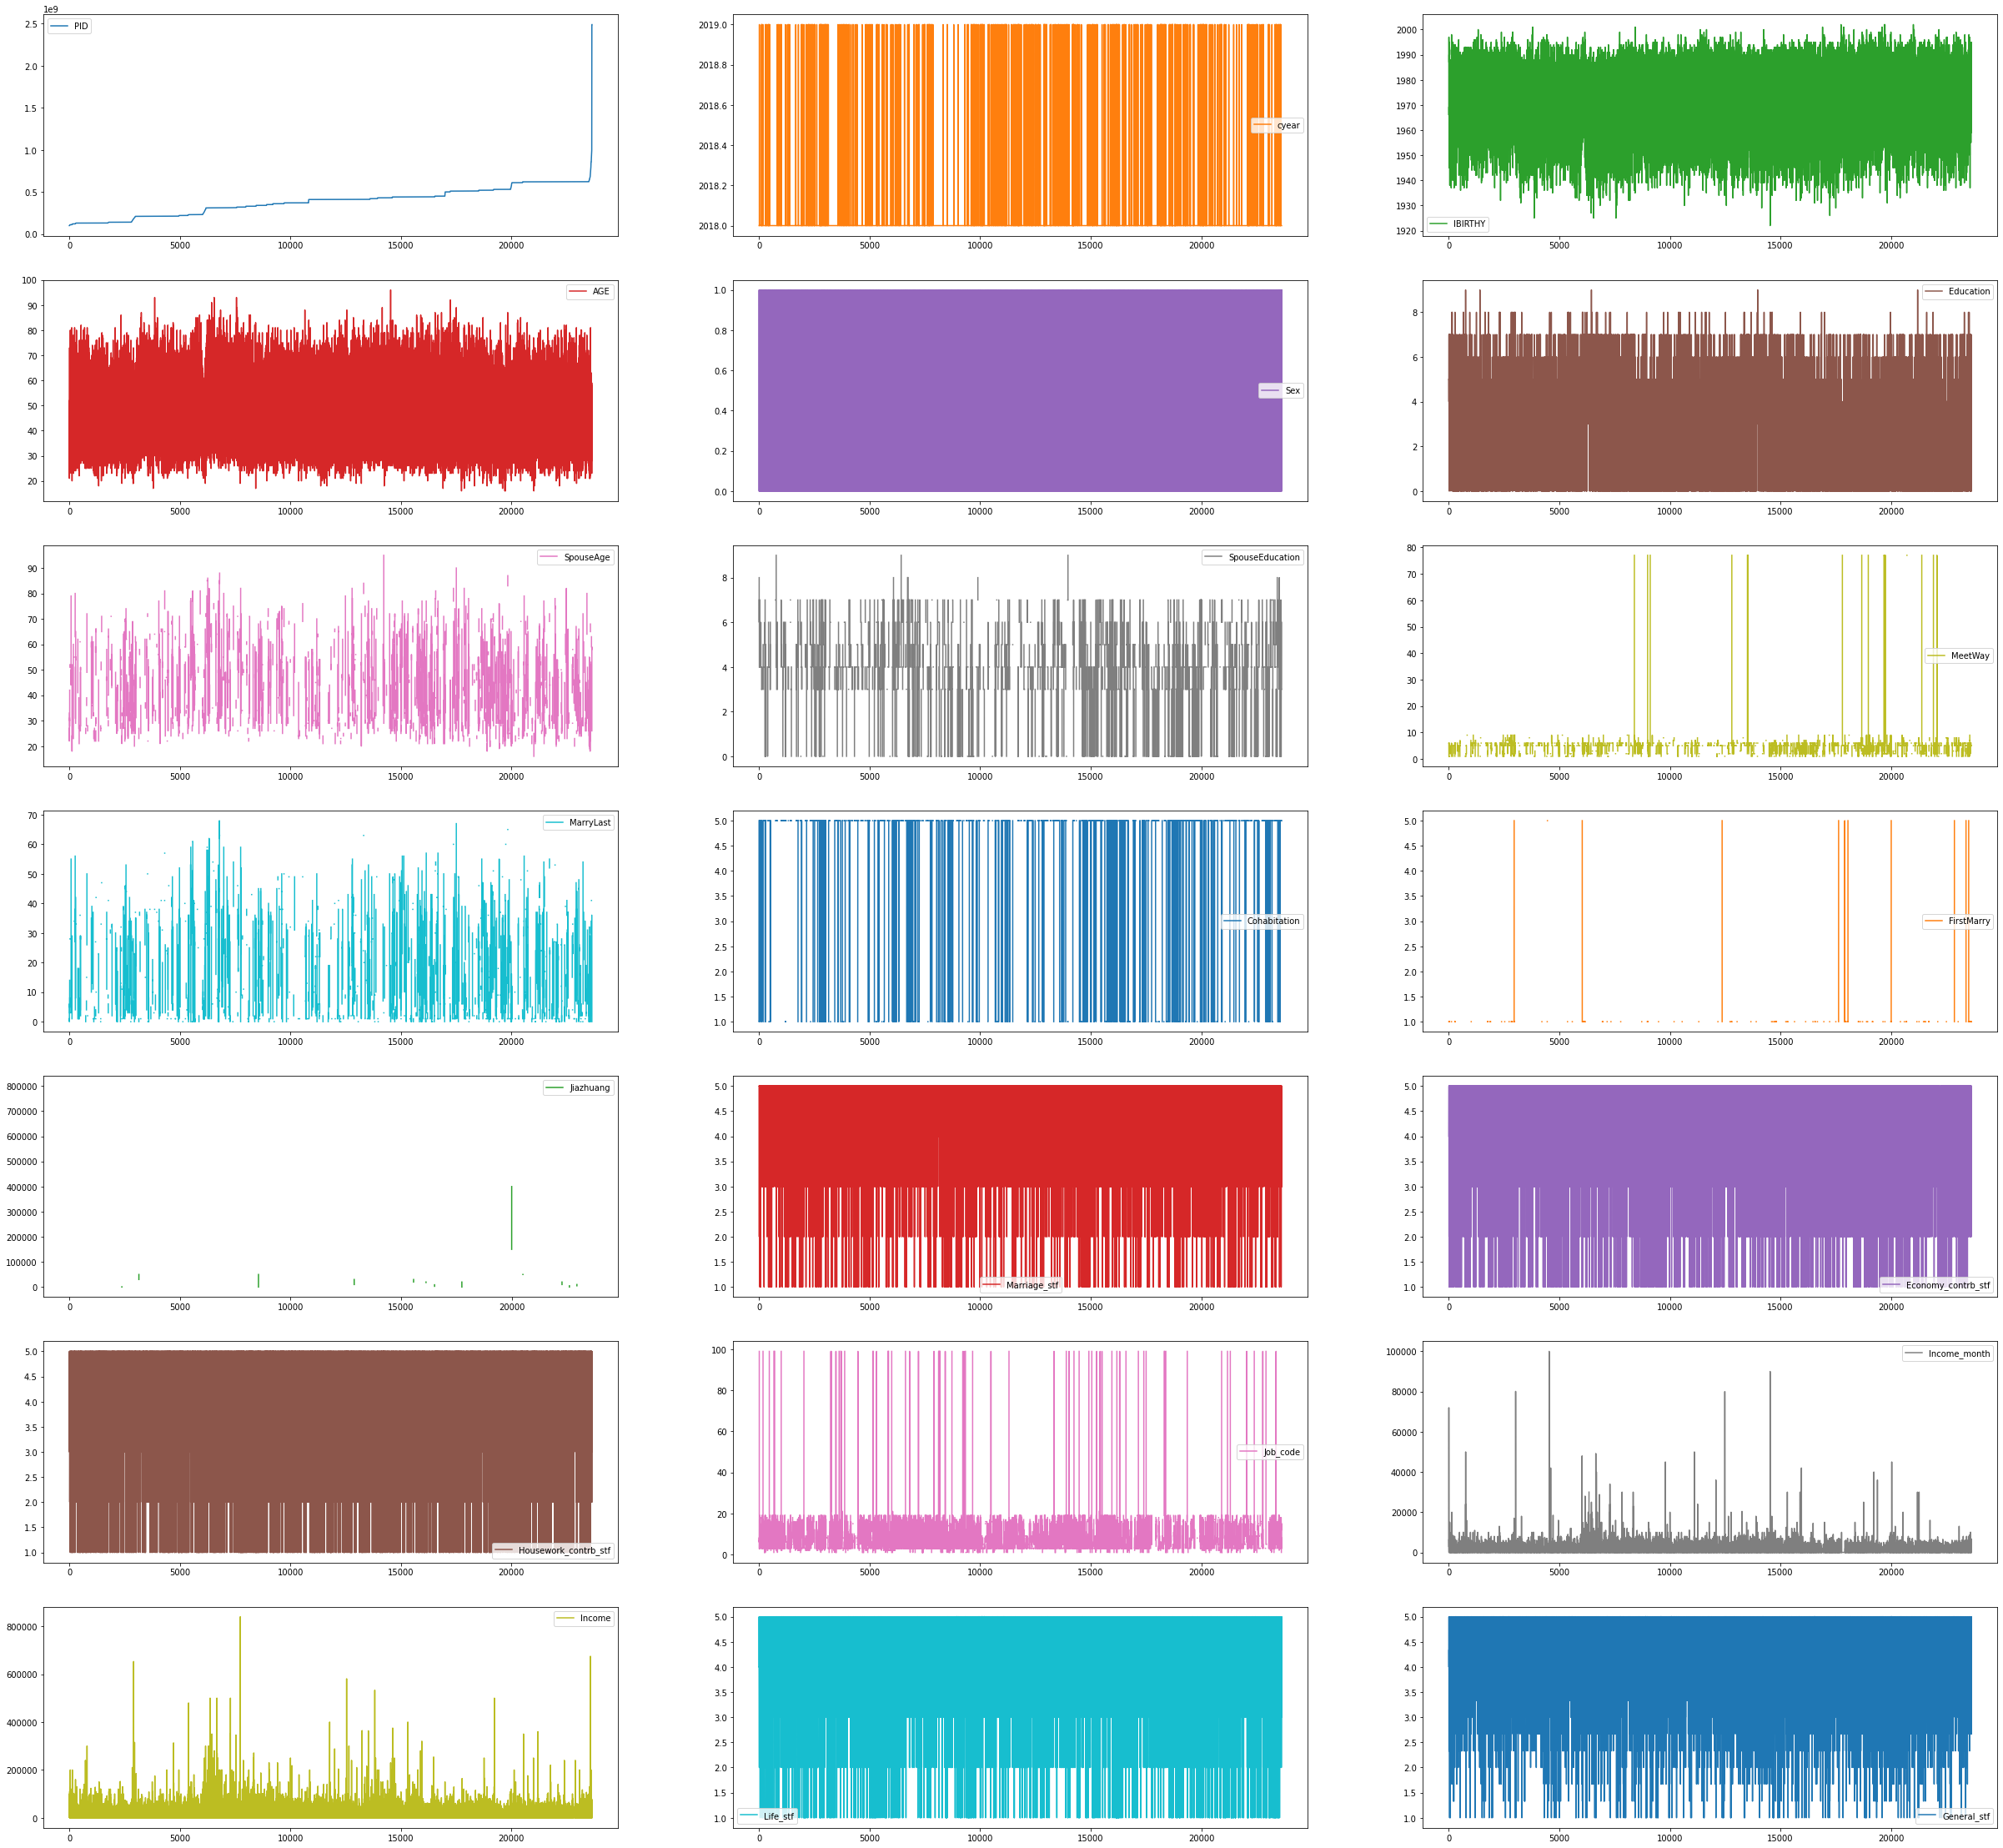

In [6]:
fig, axes = plt.subplots(figsize=(42,40), facecolor='w', edgecolor='k', ncols=3, nrows=7)
data.plot(subplots=True, ax=axes)

数据分布看起来正常。一些变量的大部分是NaN，比如嫁妆。PID的增加是由于后年的ID不同。
其他都看起来没问题。

##### Correlations

变量之间是如何相互关联的？

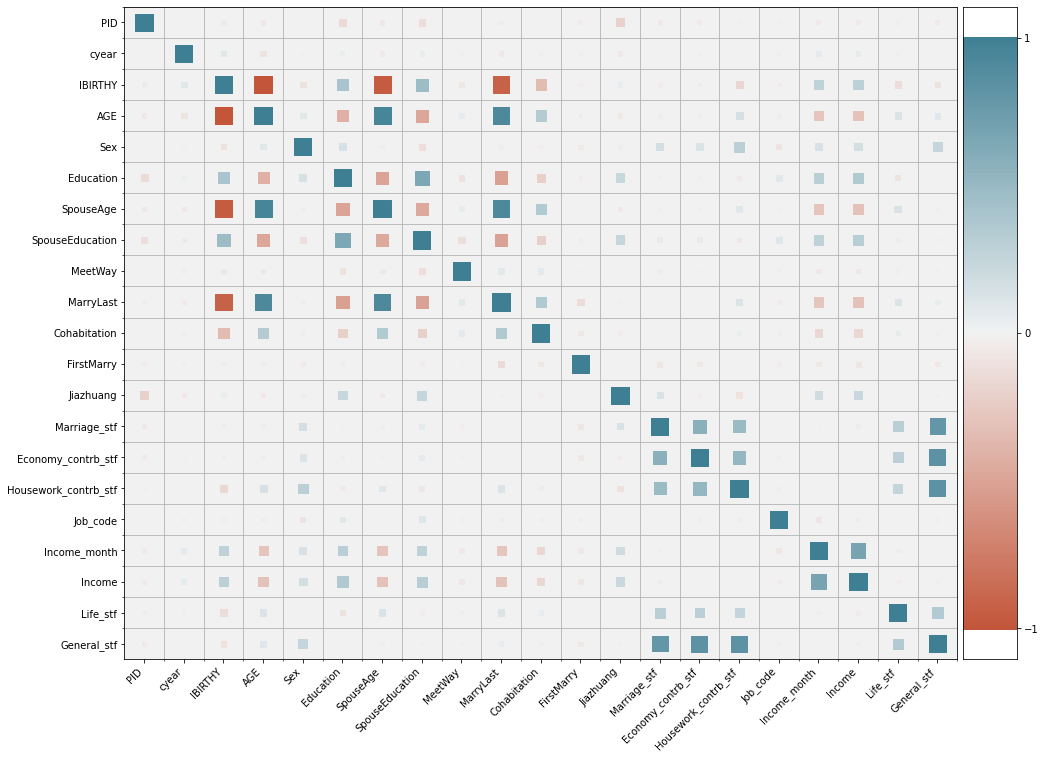

In [7]:
from heatmap import corrplot
plt.figure(figsize=(16, 12))
corrplot(data.corr(), size_scale=300)

这张图让我们已经深入数据之间的关系。

一些思想：
* 数据的样本寻求同龄的配偶（Age和SpouseAge的相关性）
* 也寻求教育同样的
* 教育和婚姻持续时间是负相关的 - 可能是因为教育越长越好 - 教育好的人更容易找到配偶； 还有教育好的女人或者男人能自己做工作 （不依赖配偶）
* 满意度之间有相关性 - 这个很合理，因为对生活满意的人更有可能对结婚也感到满意
* Age和Education是负相关的；也许因为中国的发展年轻人的教育更长





#### Categorical Variables

详细查看Categorical Variables

In [8]:
# 所有的codes ； 我们用英文的codes，因为跟matplotlib更容易用

sex_codes = {
    0: "女",
    1: "男"
}

sex_codes = {
    0: "female",
    1: "male"
}


edu_codes = {
    0: "文盲/半文盲",
    3: "小学",
    4: "初中",
    5: "高中、中专、技校或职高",
    6: "大专",
    7: "大学本科",
    8: "硕士",
    9: "博士",
}

edu_codes = {
    0: "illiterate/semi-literate",
    3: "Primary school",
    4: "Middle school",
    5: "high school, junior college, technical school or vocational high school",
    6: "college",
    7: "university undergraduate",
    8: "master's degree",
    9: "PhD",
}

meet_codes = {
    1: "在学校自己认识",
    2: "在工作场所自己认识", 
    3: "在居住地自己认识",
    4: "在其他地方自己认识", 
    5: "经亲戚介绍认识",
    6: "经朋友介绍认识",
    7: "经婚介介绍认识",
    8: "父母包办",
    9: "经过互联网认识的",
    77: "其他"
}

meet_codes = {
    1: "Meet on your own at school",
    2: "Meet yourself at work",
    3: "Meet yourself at your place of residence",
    4: "Met in other places",
    5: "Introduced by relatives",
    6: "Introduced by a friend",
    7: "Introduced by a marriage broker", 
    8: "Arranged by parents",
    9: "Met through the Internet",
    77: "Other"
}


yesno_codes = {
    1: "True",
    5: "False"
}

job_codes = {
    1: "农、林、牧、渔业",
    2: "采矿业",
    3: "制造业",
    4: "电力、燃气及水的生产和供应业",
    5: "建筑业",
    6: "交通运输、仓储和邮政业",
    7: "信息传输、计算机服务和软件业",
    8: "批发和零售业",
    9: "住宿和餐饮业",
    10: "金融业",
    11: "房地产业",
    12: "租赁和商务服务业",
    13: "科学研究、技术服务和地质勘查业",
    14: "水利、环境和公共设施管理业",
    15: "居民服务和其他服务业",
    16: "教育",
    17: "卫生、社会保障和社会福利业",
    18: "文化、体育和娱乐业",
    19: "公共管理与社会组织",
    20: "国际组织",
    21: "其他行业",
    99: "其他"
}

job_codes = {
    1: "Agriculture, forestry, animal husbandry and fishery",
    2: "Mining",
    3: "Manufacturing",
    4: "Electricity, gas and water production and supply industry",
    5: "Construction",
    6: "Transportation, storage and postal services",
    7: "Information transmission, computer services and software industry",
    8: "Wholesale and retail trade",
    9: "Accommodation and catering",
    10: "Finance",
    11: "Real estate industry",
    12: "Leasing and business services",
    13: "Scientific research, technical services and geological prospecting",
    14: "Water, environment and public facilities management industry",
    15: "residential services and other services",
    16: "Education",
    17: "Health, social security and social welfare industry",
    18: "Culture, Sports and Entertainment",
    19: "Public administration and social organizations",
    20: "International Organizations",
    21: "Other industries",
    99: "Other"
}

codes = [sex_codes, edu_codes, edu_codes, meet_codes, yesno_codes, yesno_codes, job_codes]
cols = ["Sex", "Education", "SpouseEducation", "MeetWay", "Cohabitation", "FirstMarry", "Job_code"]

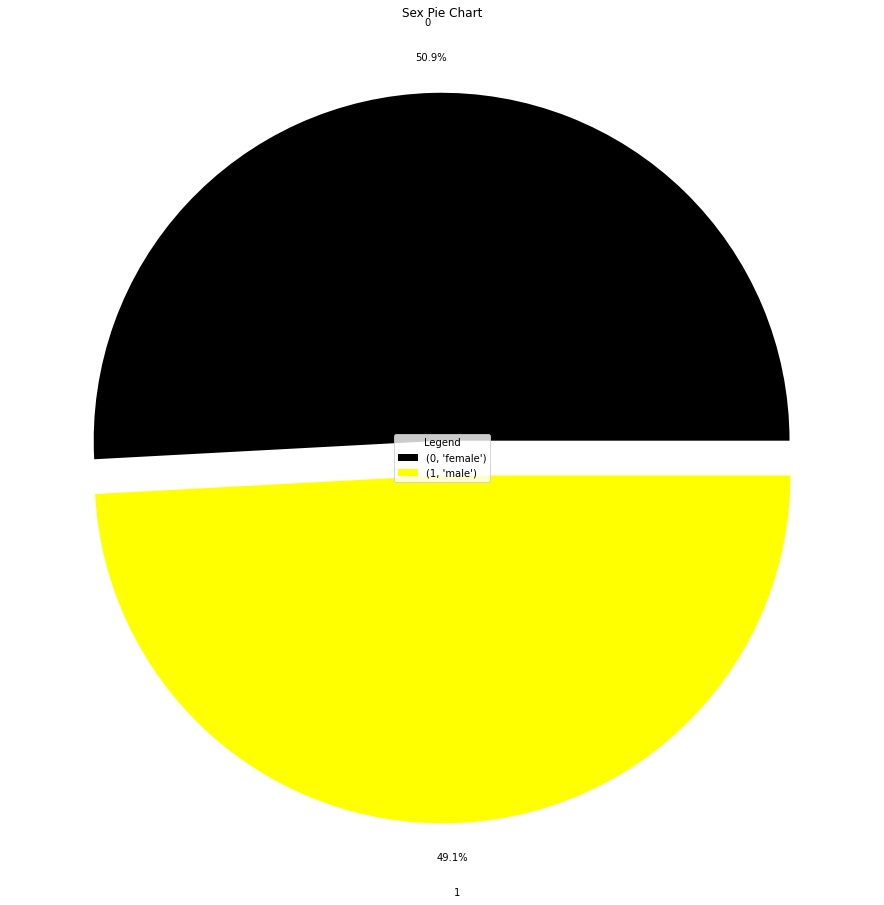

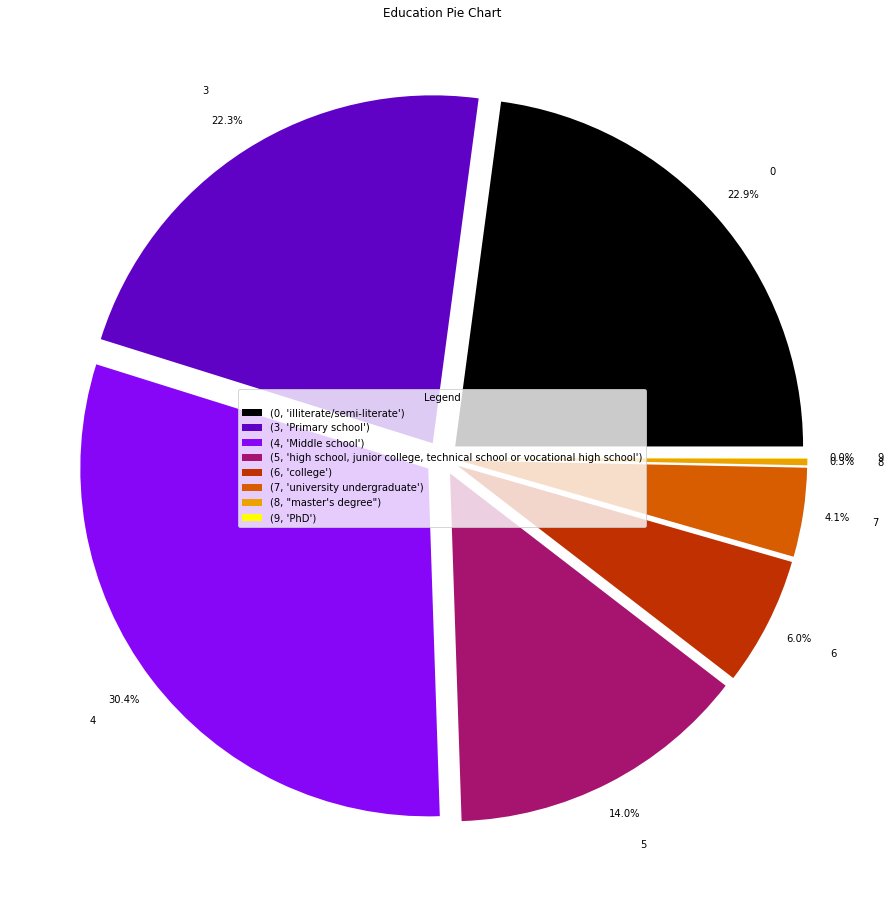

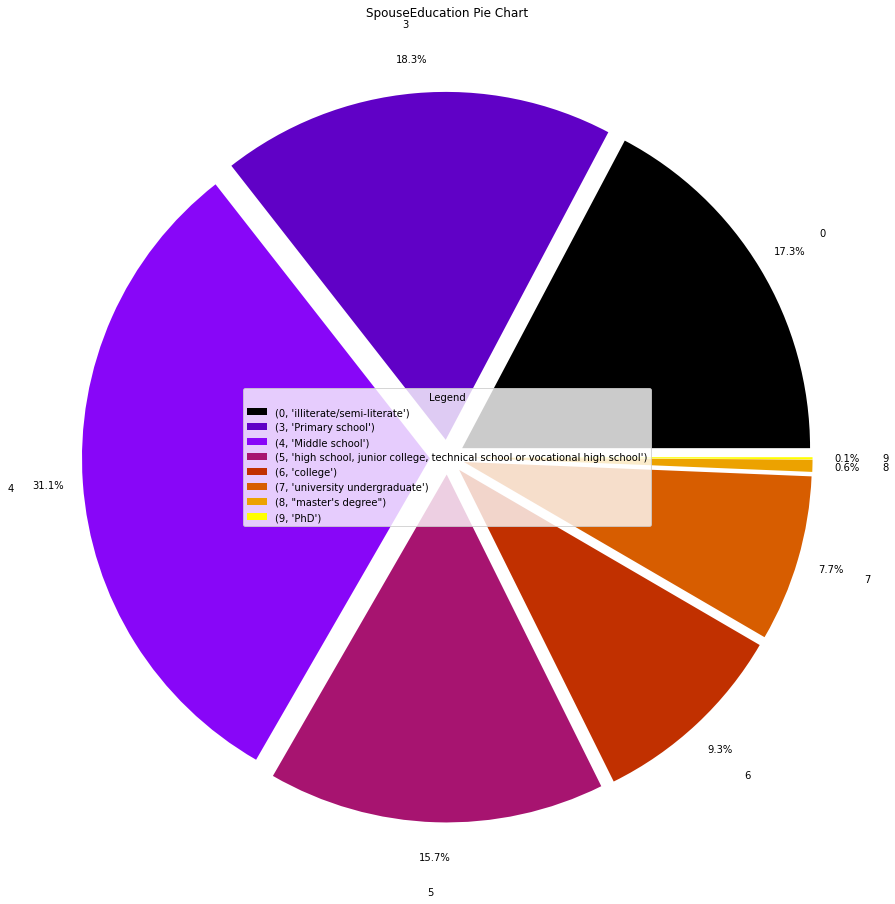

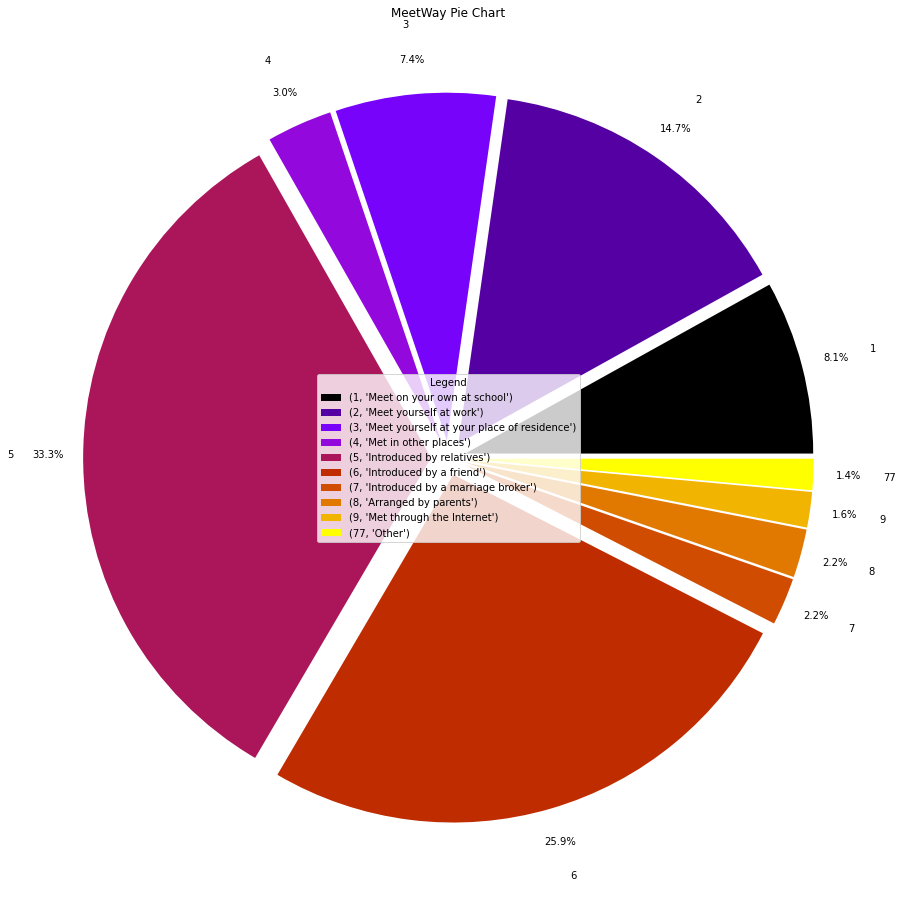

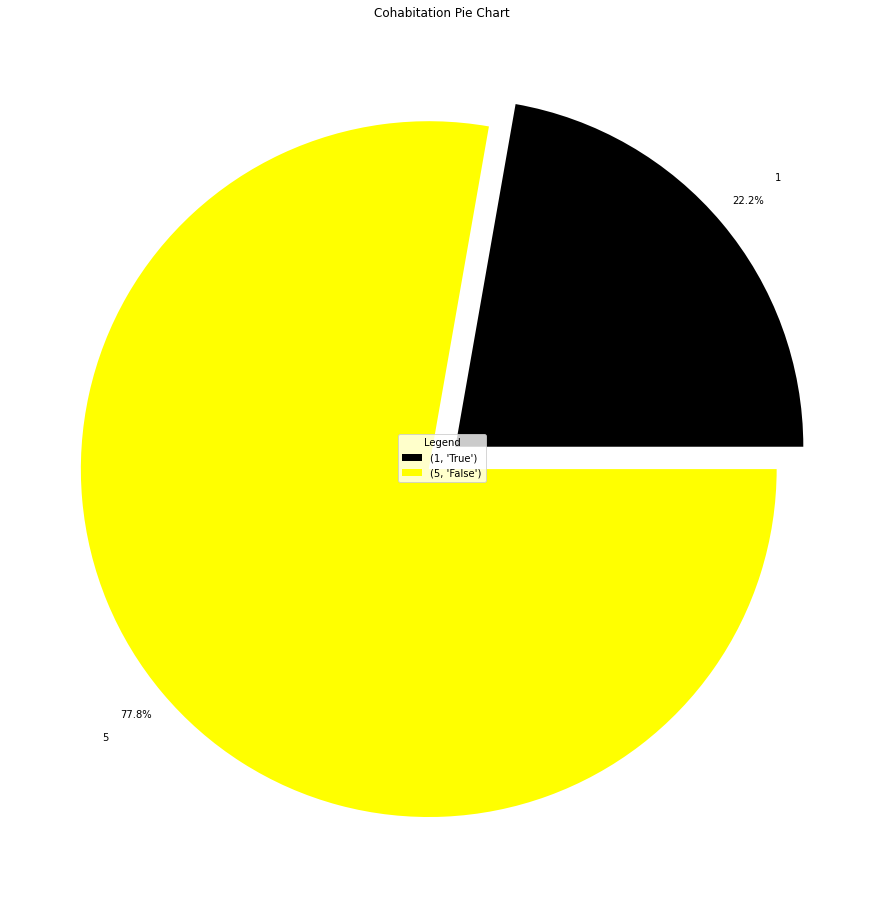

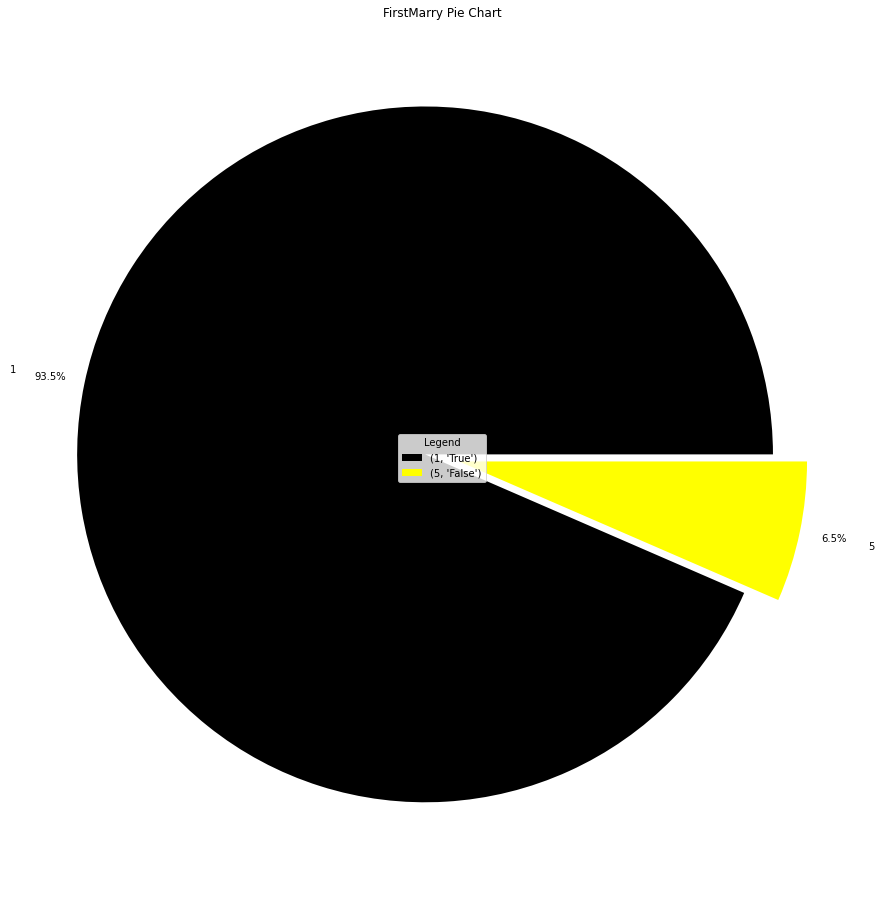

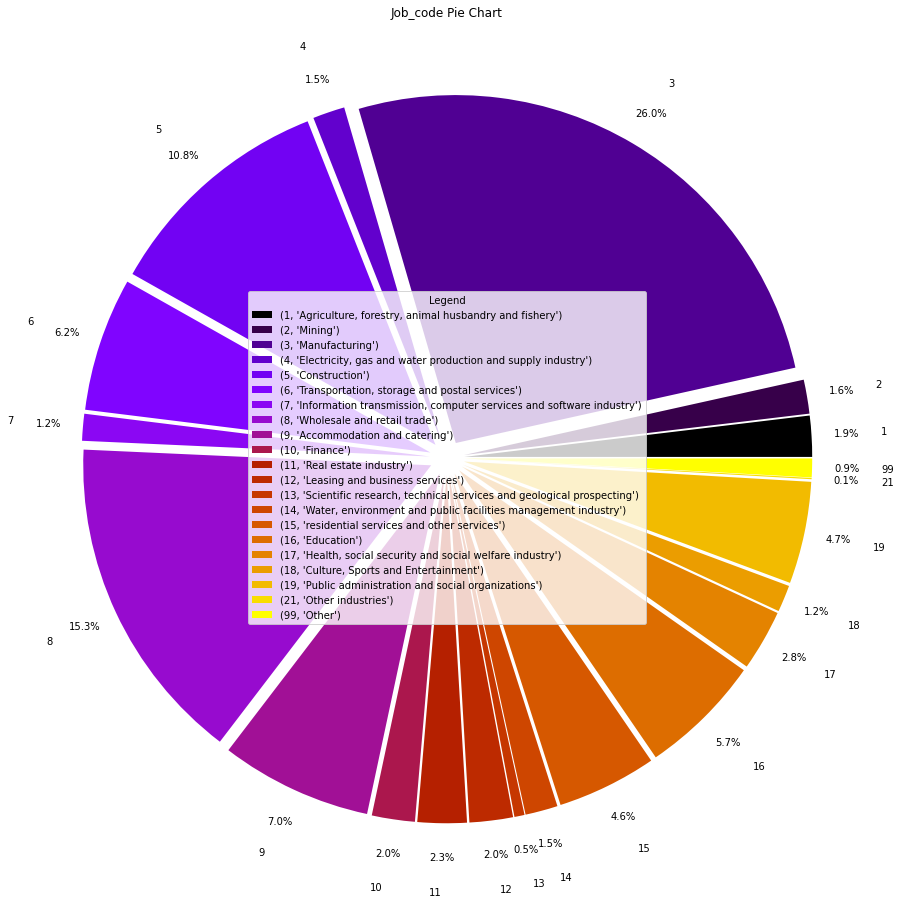

In [9]:
for col, code in zip(cols, codes):

    df = data[col].value_counts()
    df = df.sort_index()

    code_sub = {k: v for k,v in code.items() if k in df}

    fig, ax = plt.subplots(figsize=(16,16), facecolor='w', edgecolor='k', nrows=1)

    explode = [0.05] * len(code_sub)

    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, len(code_sub))]

    fig = ax.pie(df.values, autopct='%1.1f%%', colors=colors,
                    labeldistance=1.2, pctdistance=1.1, explode=explode,
                    labels=code_sub.keys())
       
       
    ax.legend(labels=code_sub.items(),
                loc='center',
                title="Legend")

    plt.title("{} Pie Chart".format(col))

一些思想：
* male和female的样本大概一样
* -
* 不到8%的人读过本科
* 文盲的样本为17.3% - 如果我们分析他们的年龄，可能会发现，较少的年轻人是文盲
* -
* 大于50%的样本是通过亲友认识配偶的 - 这个跟岁数的关系可能有意思
* -
* - 
* 超过四分之一的样本在制造业工作
 

#### Numerical Variables

详细查看Numerical Variables

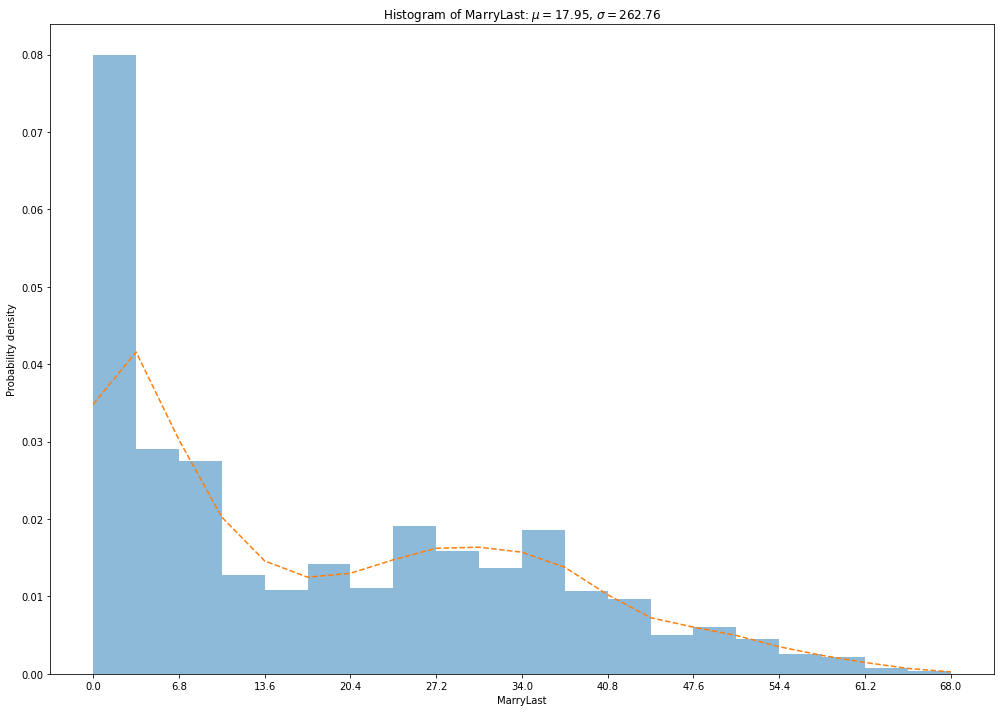

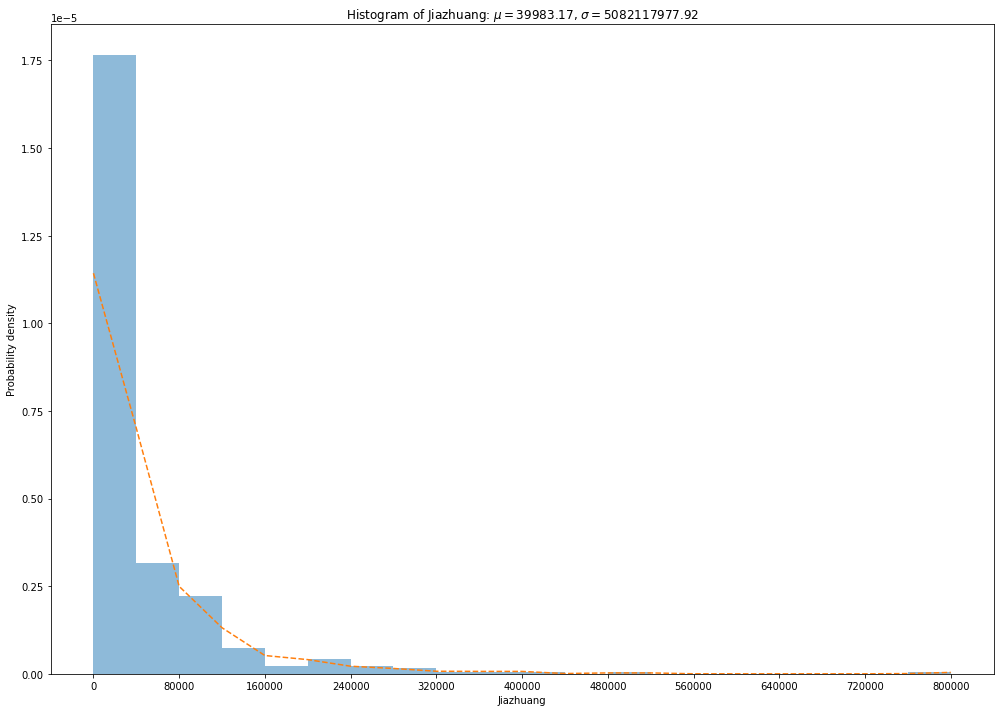

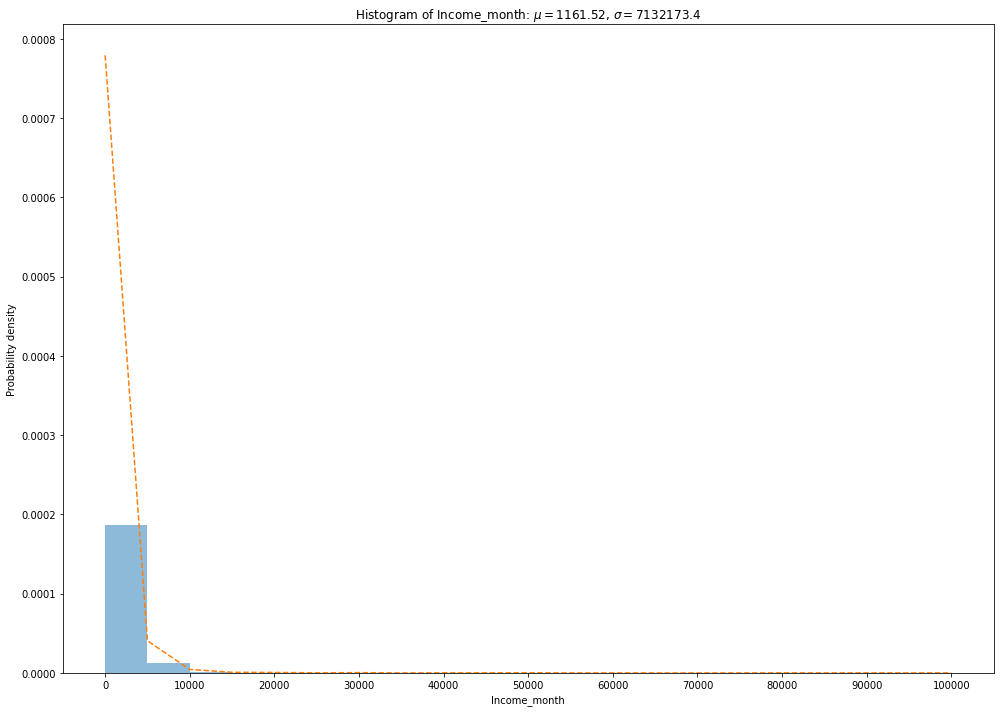

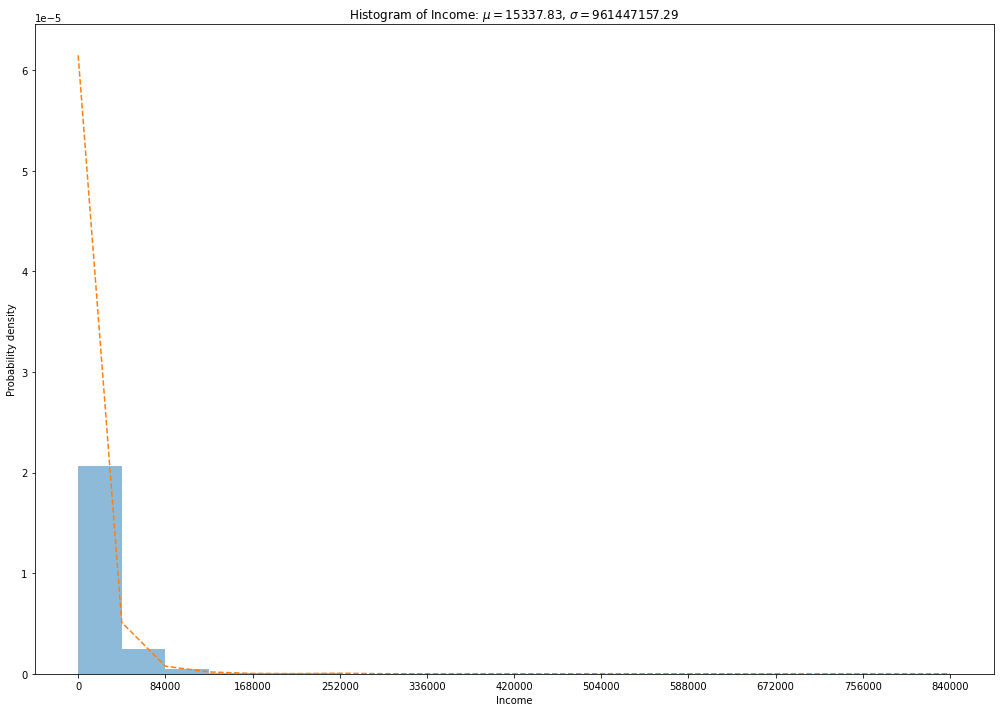

In [10]:
from scipy.stats import kde

hist_cols = ["MarryLast", "Jiazhuang", "Income_month", "Income"]
num_bins = 20

for col in hist_cols:

    sub_data = data.copy()
    sub_data.drop(sub_data.loc[sub_data[col].isnull()].index, inplace=True)

    # Estimate PDF (Probability Density Function)
    density = kde.gaussian_kde(sub_data[col].values)
    x = np.linspace(sub_data[col].min(),sub_data[col].max(),num_bins+1)
    y = density(x)

    fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')

    # Set ticks on x-axis based on bins
    plt.xticks(x[::2])

    # the histogram of the data
    y_array, x_array, patches = ax.hist(sub_data[col], num_bins, density=True, alpha=0.5)

    mu = round(sub_data[col].mean(), 2)
    var = round(sub_data[col].var(), 2)

    ax.plot(x_array, y, '--')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of {}: $\mu={}$, $\sigma={}$'.format(col, mu, var))


    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

一些思想：
* MarryLast的平均值是~18年
* Jiazhuang，Income_month和Income的离群值比较多 (std 特别高）

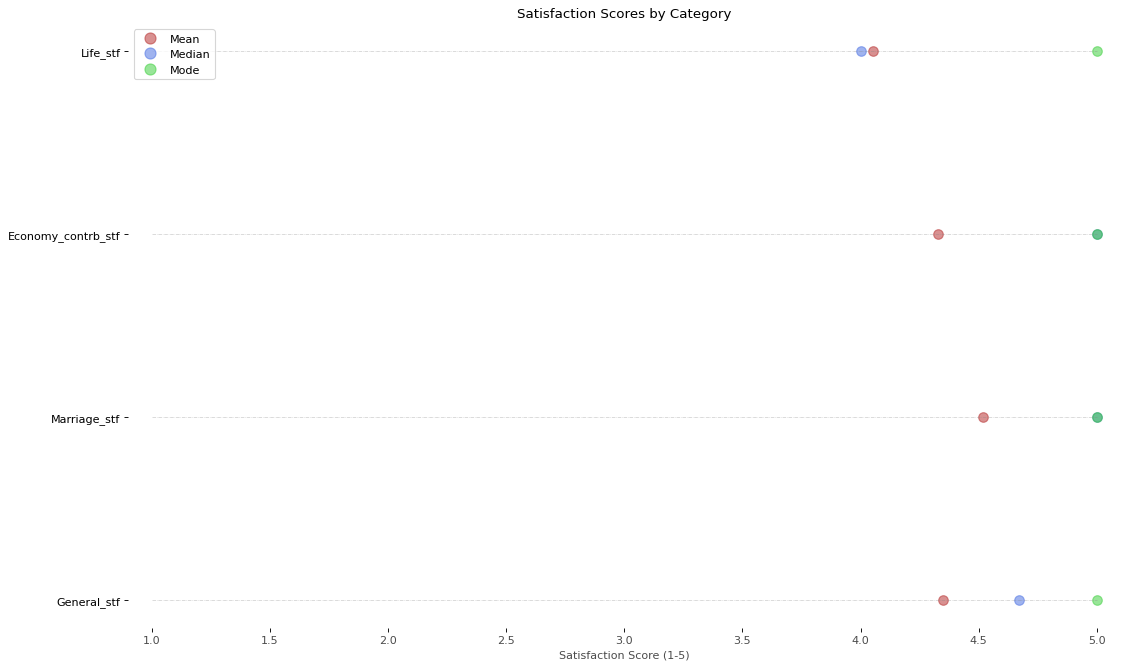

In [14]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

stf = ["General_stf", "Marriage_stf", "Economy_contrb_stf", "Life_stf"]

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi = 80)
ax.hlines(y=stf, xmin=1, xmax=5, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

for col in stf:
  data_mean = data[col].mean()
  data_median = data[col].median()
  data_mode = data[col].mode()

  ax.scatter(y=col, x=data_mean, s=75, c='firebrick', alpha=0.5)
  ax.scatter(y=col, x=data_median, s=75, c='royalblue', alpha=0.5)
  ax.scatter(y=col, x=data_mode, s=75, c='limegreen', alpha=0.5)

# Decorations
ax.set_title('Satisfaction Scores by Category')
ax.set_xlabel('Satisfaction Score (1-5)', alpha=0.7)
ax.set_xlim(0.9, 5.1)
plt.xticks(alpha=0.7)

# Remove Box
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)  


# Create Legend
mean_patch = mlines.Line2D([], [], color='firebrick', marker='o',
                          markersize=10, ls="", label='Mean', alpha=0.5)
median_patch = mlines.Line2D([], [], color='royalblue', marker='o',
                          markersize=10, ls="", label='Median', alpha=0.5)
mode_patch = mlines.Line2D([], [], color='limegreen', marker='o',
                          markersize=10, ls="", label='Mode', alpha=0.5)

plt.legend(handles=[mean_patch, median_patch, mode_patch])

一些思想
* 结婚的平均值最大
* General_stf是负偏态的；Marriage和Economy也大概这样；可是Life_stf的偏度不一样
* Life_stf一般最低；为什么? 可能有一些我们的数据不包括的变量

#### Multiple Variables

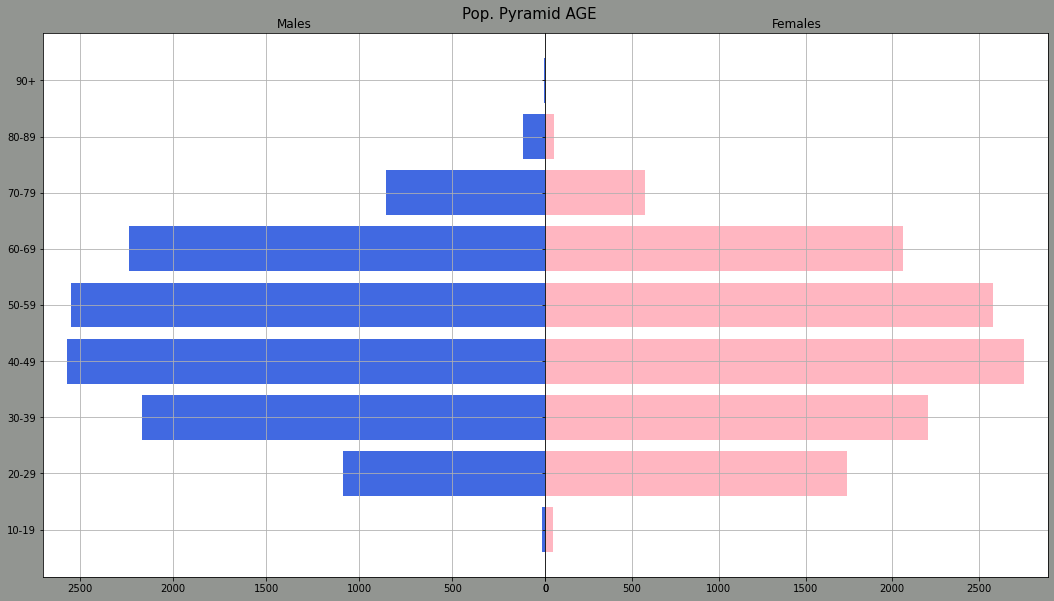

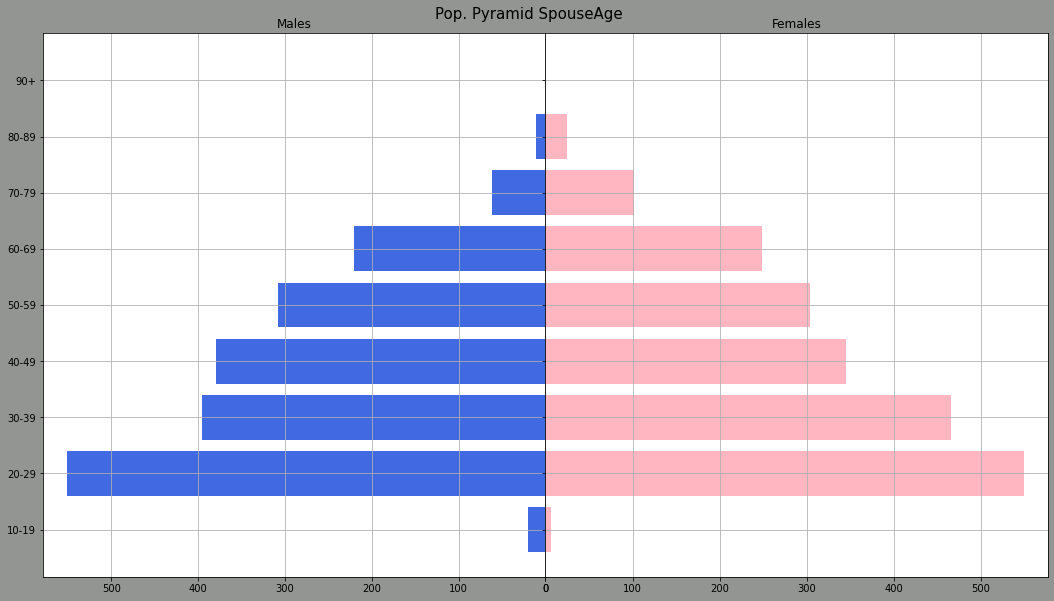

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 999]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']

df = data[["Sex", "AGE", "SpouseAge"]].copy()

for col in ["AGE", "SpouseAge"]:

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(18, 10))
    fig.subplots_adjust(wspace=0, hspace=0.3)

    # Prepare df
    df["bins"] = pd.cut(df[col], bins, labels = labels,include_lowest = True)
    df_sub = df.groupby(["bins", "Sex"]).count()
    df_sub = df_sub.reset_index()

    # Create male & female bars
    axes[0].barh(labels, df_sub.loc[df_sub.Sex==1][col], align='center', color='royalblue')
    axes[0].set(title='Males')

    axes[1].barh(labels, df_sub.loc[df_sub.Sex==0][col], align='center', color='lightpink')
    axes[1].set(title='Females')

    axes[0].grid()
    axes[1].grid()

    axes[0].invert_xaxis()

    fig.patch.set_facecolor('xkcd:grey')
    plt.figtext(.5,.9, f"Pop. Pyramid {col}", fontsize=15, ha='center')

* AGE和SpouseAge全部不一样 - 也许参加调查的人大部分是老年夫妇，但也有一些老年男人和女人，他们有年轻的伴侣，但伴侣没有参加调查
* 问卷参加人的Population Pyramid和中国的population pyramid不一样，所以我们可以说 参与人不是完全随机地从中国人口中抽取的。
* 大部分的参加人的年龄有40-49岁

### 研究问题

#### 生活满意度和行业是否独立？

In [16]:
job_codes = {
    1: "农、林、牧、渔业",
    2: "采矿业",
    3: "制造业",
    4: "电力、燃气及水的生产和供应业",
    5: "建筑业",
    6: "交通运输、仓储和邮政业",
    7: "信息传输、计算机服务和软件业",
    8: "批发和零售业",
    9: "住宿和餐饮业",
    10: "金融业",
    11: "房地产业",
    12: "租赁和商务服务业",
    13: "科学研究、技术服务和地质勘查业",
    14: "水利、环境和公共设施管理业",
    15: "居民服务和其他服务业",
    16: "教育",
    17: "卫生、社会保障和社会福利业",
    18: "文化、体育和娱乐业",
    19: "公共管理与社会组织",
    20: "国际组织",
    21: "其他行业",
    99: "其他"
}

job_codes = {
    1: "Agriculture, forestry, animal husbandry and fishery",
    2: "Mining",
    3: "Manufacturing",
    4: "Electricity, gas and water production and supply industry",
    5: "Construction",
    6: "Transportation, storage and postal services",
    7: "Information transmission, computer services and software industry",
    8: "Wholesale and retail trade",
    9: "Accommodation and catering",
    10: "Finance",
    11: "Real estate industry",
    12: "Leasing and business services",
    13: "Scientific research, technical services and geological prospecting",
    14: "Water, environment and public facilities management industry",
    15: "residential services and other services",
    16: "Education",
    17: "Health, social security and social welfare industry",
    18: "Culture, Sports and Entertainment",
    19: "Public administration and social organizations",
    20: "International Organizations",
    21: "Other industries",
    99: "Other"
}


job_codes = {k: v for k,v in job_codes.items() if k in data.Job_code.unique()}

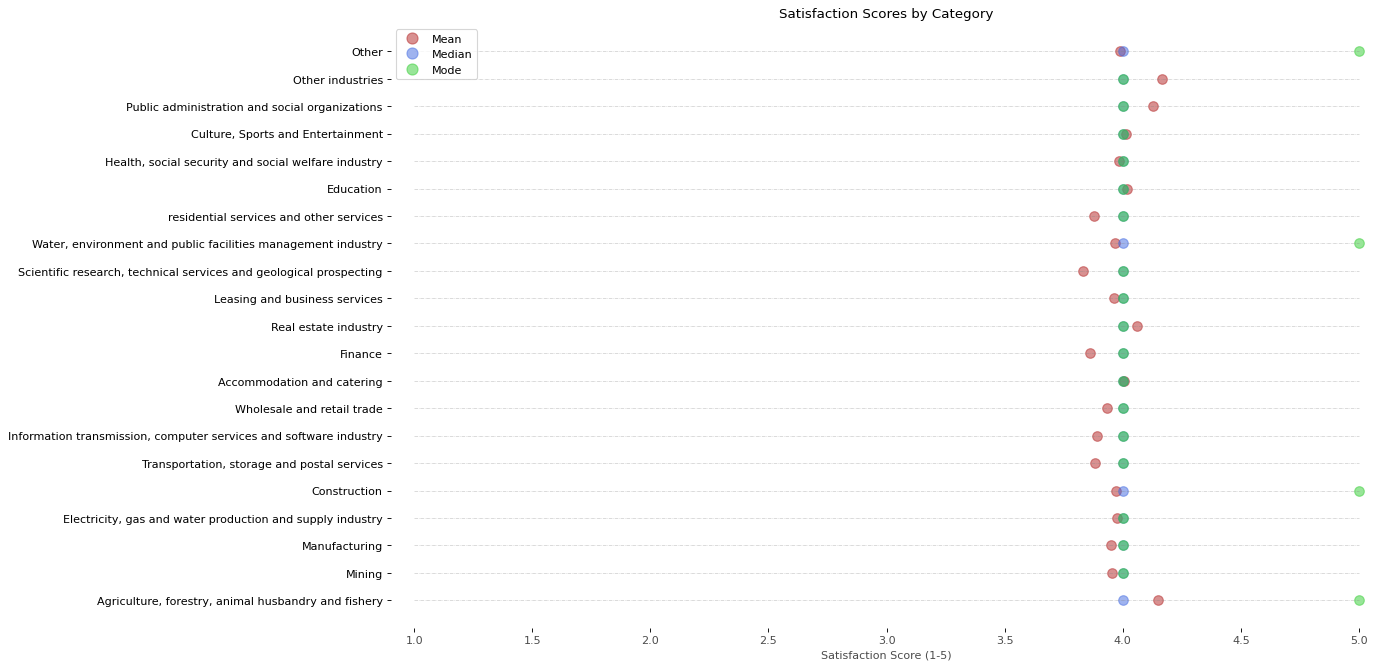

In [17]:
import matplotlib.patches as mpatches

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi = 80)

ax.hlines(y=list(job_codes.values()), xmin=1, xmax=5, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

for code, job in job_codes.items():
  if code not in data.Job_code:
    continue
  data_mean = data.loc[data.Job_code == code, 'Life_stf'].mean()
  data_median = data.loc[data.Job_code == code, 'Life_stf'].median()
  data_mode = data.loc[data.Job_code == code, 'Life_stf'].mode()

  ax.scatter(y=job, x=data_mean, s=75, c='firebrick', alpha=0.5)
  ax.scatter(y=job, x=data_median, s=75, c='royalblue', alpha=0.5)
  ax.scatter(y=job, x=data_mode, s=75, c='limegreen', alpha=0.5)

# Decorations
ax.set_title('Satisfaction Scores by Category')
ax.set_xlabel('Satisfaction Score (1-5)', alpha=0.7)
ax.set_xlim(0.9, 5.1)
plt.xticks(alpha=0.7)

# Remove Box
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)  


# Create Legend
mean_patch = mlines.Line2D([], [], color='firebrick', marker='o',
                          markersize=10, ls="", label='Mean', alpha=0.5)
median_patch = mlines.Line2D([], [], color='royalblue', marker='o',
                          markersize=10, ls="", label='Median', alpha=0.5)
mode_patch = mlines.Line2D([], [], color='limegreen', marker='o',
                          markersize=10, ls="", label='Mode', alpha=0.5)

plt.legend(handles=[mean_patch, median_patch, mode_patch])

In [18]:
# 上面的图不够，我们因该进行一个t-test

from scipy import stats
np.random.seed(12345678)

sub_df = data.groupby(["Job_code"]).agg({'Life_stf':['mean', 'count']})
sub_df = sub_df.reset_index()
sub_df.columns=['Job_code','Stf_mean','Stf_count']

alpha = 0.001
significant = set()

for code in sub_df.Job_code.values:
  for code_t in sub_df.Job_code.values:

    statistic, pvalue = stats.ttest_ind(data.loc[data.Job_code == code, 'Life_stf'].values,
                                        data.loc[data.Job_code == code_t, 'Life_stf'].values)
    
    if pvalue < alpha:
      significant.add((min(code, code_t), max(code, code_t)))


print("在进行了t检验后，我们拒绝了以下工作类别的生活满意度平均值是一样的。\n\n")

for code, code_t in significant:

  stf_name = data.loc[data.Job_code == code, 'Life_stf'].mean(), job_codes[code]
  stf_name_t = data.loc[data.Job_code == code_t, 'Life_stf'].mean(), job_codes[code_t]

  stf_high = max([stf_name, stf_name_t], key=lambda x: x[0])
  stf_low = min([stf_name, stf_name_t], key=lambda x: x[0])

  print(f"工作，生活满意度平均：{stf_high[1]}, {round(stf_high[0], 2)}\t  {stf_low[1]} {round(stf_low[0], 2)}\t（alpha=0.001 ***)\n")

在进行了t检验后，我们拒绝了以下工作类别的生活满意度平均值是一样的。


工作，生活满意度平均：Public administration and social organizations, 4.13	  Transportation, storage and postal services 3.88	（alpha=0.001 ***)

工作，生活满意度平均：Public administration and social organizations, 4.13	  Finance 3.86	（alpha=0.001 ***)

工作，生活满意度平均：Public administration and social organizations, 4.13	  Wholesale and retail trade 3.93	（alpha=0.001 ***)

工作，生活满意度平均：Agriculture, forestry, animal husbandry and fishery, 4.15	  Transportation, storage and postal services 3.88	（alpha=0.001 ***)

工作，生活满意度平均：Public administration and social organizations, 4.13	  Manufacturing 3.95	（alpha=0.001 ***)

工作，生活满意度平均：Public administration and social organizations, 4.13	  residential services and other services 3.88	（alpha=0.001 ***)



- t-test的假设是每个行业的生活满意度的平均值是一样的 - 进行t-test后可以拒绝那个假设对于上面的行业
- 如果只看图标，"科学研究、技术服务和地质勘查业 / Scientific research, technical services and geological prospecting"看起来满意度最低，但是样本太少了，所以不能拒绝t-test的假设
- 公共管理与社会组织 / Public administration and social organizations 的生活满意度的高度可能是因为帮助别人使人快乐。：）
- 公共管理与社会组织 / Public administration and social organizations 的生活满意度平均值比 "农、林、牧、渔业 / Agriculture, forestry, animal husbandry and fishery"少，但是样本更多，所以置信度更高
- 因为Transportation, storage and postal services 的工作每天大概一样，可能生活满意度那么小

#### 嫁妆是否现在不重要了 (年轻人不关） ？

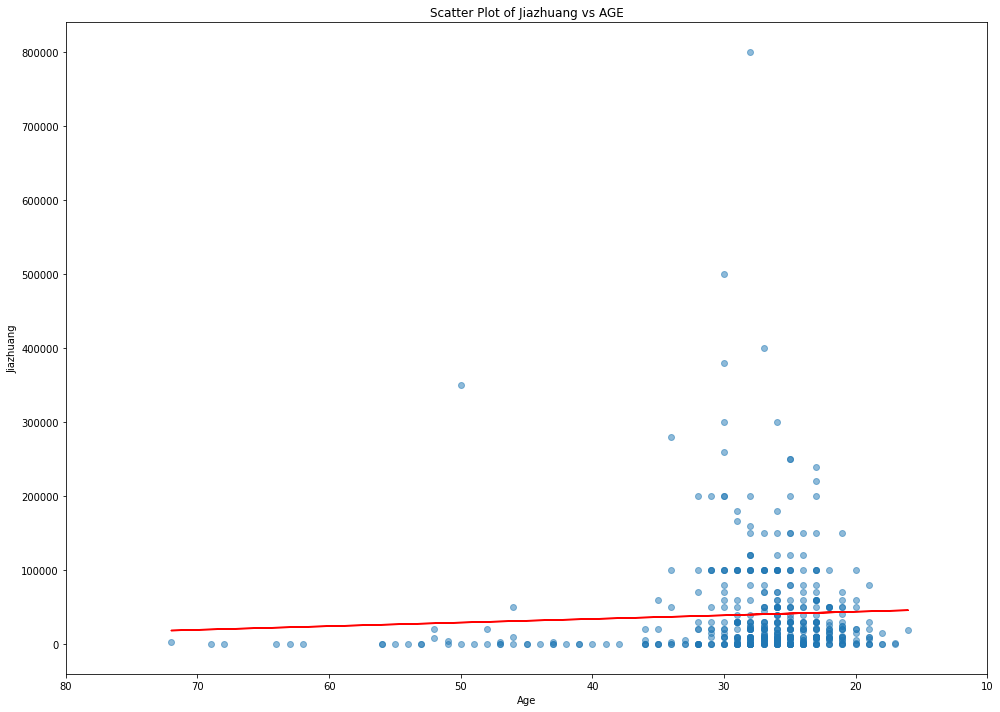

In [19]:
df = data[data.Jiazhuang.notnull()]
fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')

ax.scatter(df.AGE, df.Jiazhuang, alpha=0.5)#, c=colors, alpha=0.5)

ax.set_ylabel('Jiazhuang')
ax.set_xlabel('Age')
ax.set_title('Scatter Plot of Jiazhuang vs AGE')

ax.set_xlim(80, 10)

# Estimate PDF (Probability Density Function)
density = kde.gaussian_kde(df["Jiazhuang"].values)

# Fit polynomial function on data
z = np.polyfit(df["AGE"], df["Jiazhuang"], 1)
p = np.poly1d(z)
ax.plot(df["AGE"],p(df["AGE"]), "red")

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

- 我的想法是不正确的 - 好像越来越重要
- 但是可能也是因为老人都忘记了嫁妆 （nan比较多）
- 嫁妆为0一直有的

#### MeetWay 和 结婚的岁数有何关系？

In [20]:
meet_codes = {
    1: "在学校自己认识",
    2: "在工作场所自己认识", 
    3: "在居住地自己认识",
    4: "在其他地方自己认识", 
    5: "经亲戚介绍认识",
    6: "经朋友介绍认识",
    7: "经婚介介绍认识",
    8: "父母包办",
    9: "经过互联网认识的",
    77: "其他"
}

meet_codes = {
    1: "Meet on your own at school",
    2: "Meet yourself at work",
    3: "Meet yourself at your place of residence",
    4: "Met in other places",
    5: "Introduced by relatives",
    6: "Introduced by a friend",
    7: "Introduced by a marriage broker", 
    8: "Arranged by parents",
    9: "Met through the Internet",
    77: "Other"
}

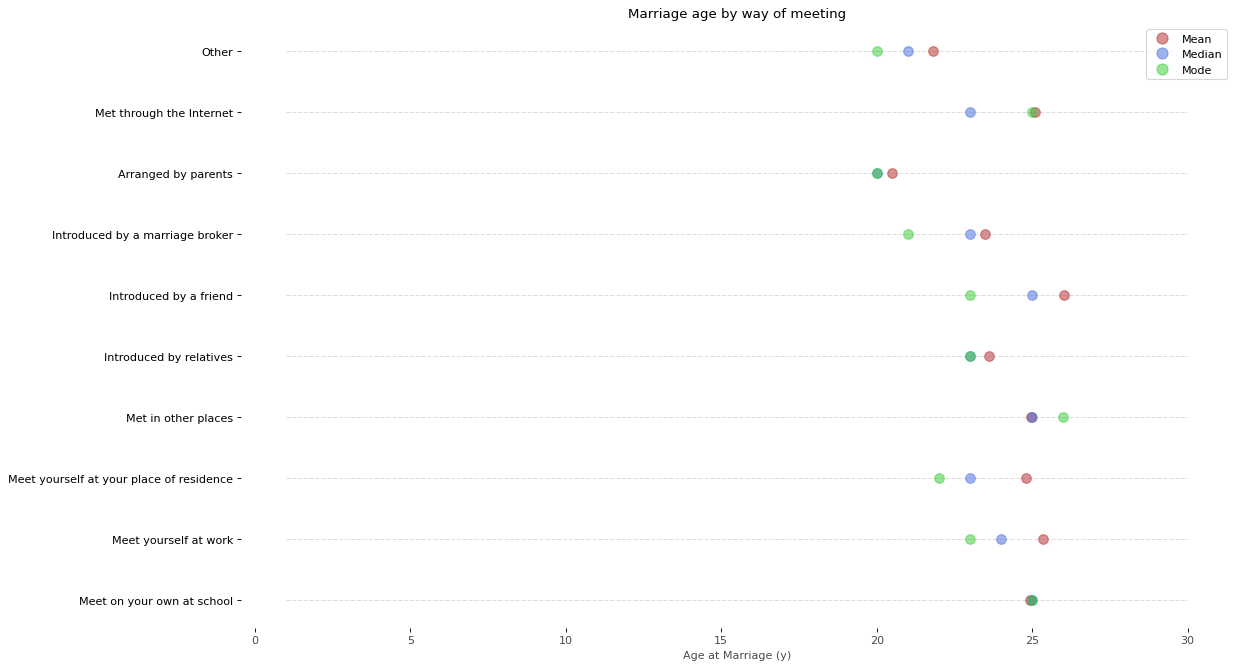

In [22]:
df = data.copy()

# Estimate Age at time when got married
df["MarryAge"] = df["AGE"] - df["MarryLast"]

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi = 80)

ax.hlines(y=list(meet_codes.values()), xmin=1, xmax=30, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

for code, job in meet_codes.items():
  if code not in data.Job_code:
    continue
  data_mean = df.loc[df.MeetWay == code, 'MarryAge'].mean()
  data_median = df.loc[df.MeetWay == code, 'MarryAge'].median()
  data_mode = df.loc[df.MeetWay == code, 'MarryAge'].mode()

  ax.scatter(y=job, x=data_mean, s=75, c='firebrick', alpha=0.5)
  ax.scatter(y=job, x=data_median, s=75, c='royalblue', alpha=0.5)
  ax.scatter(y=job, x=data_mode, s=75, c='limegreen', alpha=0.5)

# Decorations
ax.set_title('Marriage age by way of meeting')
ax.set_xlabel('Age at Marriage (y)', alpha=0.7)

plt.xticks(alpha=0.7)

# Remove Box
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)  


# Create Legend
mean_patch = mlines.Line2D([], [], color='firebrick', marker='o',
                          markersize=10, ls="", label='Mean', alpha=0.5)
median_patch = mlines.Line2D([], [], color='royalblue', marker='o',
                          markersize=10, ls="", label='Median', alpha=0.5)
mode_patch = mlines.Line2D([], [], color='limegreen', marker='o',
                          markersize=10, ls="", label='Mode', alpha=0.5)

plt.legend(handles=[mean_patch, median_patch, mode_patch])

* 通过朋友认识的平均值最高 - 可能是因为朋友们会发现他一直一个人，我应该帮助...
* Arranged by Parents的平均值小 - 如果配偶是被父母决定的，那20岁的时候直接结婚有道理的
* 大部分的MeetWay都是正偏态（positive skew）- 所以非常大的离群值比较多 - 我们下面再看结婚时年龄最大的样本
* 非常小的离群值当然没有，因为在中国结婚需要 >20 岁


##### 如果没有 MarryLast = 0 

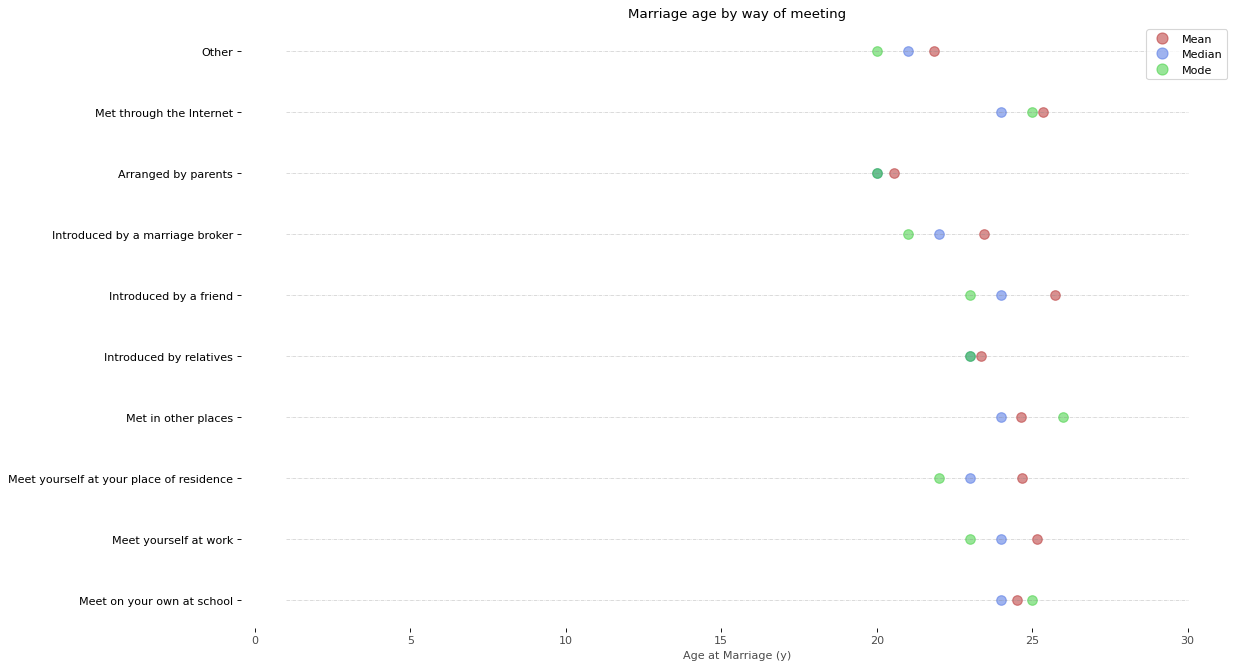

In [23]:
df = data.copy()

# Estimate Age at time when got married
df["MarryAge"] = df["AGE"] - df["MarryLast"]

df.drop(df.loc[df["MarryLast"] == 0].index, inplace=True)

import matplotlib.patches as mpatches

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi = 80)

ax.hlines(y=list(meet_codes.values()), xmin=1, xmax=30, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

for code, job in meet_codes.items():
  if code not in data.Job_code:
    continue
  data_mean = df.loc[df.MeetWay == code, 'MarryAge'].mean()
  data_median = df.loc[df.MeetWay == code, 'MarryAge'].median()
  data_mode = df.loc[df.MeetWay == code, 'MarryAge'].mode()

  ax.scatter(y=job, x=data_mean, s=75, c='firebrick', alpha=0.5)
  ax.scatter(y=job, x=data_median, s=75, c='royalblue', alpha=0.5)
  ax.scatter(y=job, x=data_mode, s=75, c='limegreen', alpha=0.5)

# Decorations
ax.set_title('Marriage age by way of meeting')
ax.set_xlabel('Age at Marriage (y)', alpha=0.7)

plt.xticks(alpha=0.7)

# Remove Box
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)  


# Create Legend
mean_patch = mlines.Line2D([], [], color='firebrick', marker='o',
                          markersize=10, ls="", label='Mean', alpha=0.5)
median_patch = mlines.Line2D([], [], color='royalblue', marker='o',
                          markersize=10, ls="", label='Median', alpha=0.5)
mode_patch = mlines.Line2D([], [], color='limegreen', marker='o',
                          markersize=10, ls="", label='Mode', alpha=0.5)

plt.legend(handles=[mean_patch, median_patch, mode_patch])

* 这张图是为了分析MarryLast=0是不是一个错误， 但结果大概一样，所以我们可以用MarryLast=0的样本

##### 结婚的岁数最大

In [90]:
df = data.copy()

# Estimate Age at time when got married
df["MarryAge"] = df["AGE"] - df["MarryLast"]

In [91]:
df.sort_values(by=["MarryAge"], ascending=[False]).head(5)

,PID,cyear,IBIRTHY,AGE,Sex,Education,SpouseAge,SpouseEducation,MeetWay,MarryLast,Cohabitation,FirstMarry,Jiazhuang,Marriage_stf,Economy_contrb_stf,Housework_contrb_stf,Job_code,Income_month,Income,Life_stf,General_stf,MarryAge
14534,430620601.0,2018.0,1922.0,96.0,1.0,8.0,25.0,7.0,1.0,0.0,1.0,NaN,NaN,5.0,5.0,5.0,3.0,16000.0,230000.0,4.0,5.00,96.0
20491,610369104.0,2018.0,1940.0,78.0,1.0,5.0,67.0,0.0,5.0,0.0,5.0,NaN,NaN,4.0,3.0,4.0,NaN,0.0,0.0,3.0,3.67,78.0
22481,621220101.0,2018.0,1936.0,82.0,1.0,0.0,53.0,0.0,5.0,12.0,5.0,NaN,NaN,5.0,4.0,5.0,NaN,0.0,0.0,5.0,4.67,70.0
280,123844601.0,2018.0,1945.0,73.0,1.0,4.0,61.0,3.0,3.0,4.0,5.0,5.0,NaN,4.0,5.0,5.0,1.0,0.0,10000.0,4.0,4.67,69.0
5781,230426601.0,2018.0,1949.0,69.0,0.0,3.0,62.0,4.0,5.0,1.0,5.0,NaN,0.0,5.0,5.0,5.0,NaN,0.0,0.0,5.0,5.00,68.0


In [92]:
# 第一次结婚 + 岁数最大
df.sort_values(by=["FirstMarry", "MarryAge"], ascending=[True, False]).head(5)

,PID,cyear,IBIRTHY,AGE,Sex,Education,SpouseAge,SpouseEducation,MeetWay,MarryLast,Cohabitation,FirstMarry,Jiazhuang,Marriage_stf,Economy_contrb_stf,Housework_contrb_stf,Job_code,Income_month,Income,Life_stf,General_stf,MarryAge
2950,194988551.0,2018.0,1968.0,50.0,1.0,3.0,32.0,3.0,3.0,10.0,5.0,1.0,NaN,5.0,4.0,3.0,6.0,2000.0,24000.0,4.0,4.0,40.0
6301,310576103.0,2018.0,1969.0,49.0,1.0,5.0,NaN,0.0,6.0,9.0,5.0,1.0,NaN,5.0,5.0,5.0,8.0,2600.0,30000.0,1.0,5.0,40.0
15637,440998102.0,2018.0,1957.0,61.0,1.0,4.0,47.0,3.0,2.0,21.0,5.0,1.0,NaN,5.0,5.0,5.0,NaN,0.0,0.0,5.0,5.0,40.0
19981,556201601.0,2018.0,1951.0,67.0,1.0,6.0,65.0,5.0,2.0,27.0,5.0,1.0,NaN,5.0,5.0,5.0,NaN,0.0,0.0,5.0,5.0,40.0
122,111308551.0,2018.0,1978.0,40.0,1.0,4.0,36.0,3.0,3.0,2.0,1.0,1.0,NaN,4.0,3.0,5.0,5.0,4000.0,50000.0,1.0,4.0,38.0


- 70岁多的人还在结婚 - 爱是盲目的 =） 
- 第一次结婚年龄最大的人有40岁


##### 在工作场所自己认识 有没有一些行业更常见？

In [89]:
print("从最浪漫到最不浪漫")

df = data.copy()
df.replace({"Job_code": job_codes}, inplace=True)

df = ((df.loc[df["MeetWay"] == 2, 'Job_code'].value_counts() / sum(df.loc[df["MeetWay"] == 2, 'Job_code'].value_counts())) * 100 - \
(df.Job_code.value_counts() / sum(df.Job_code.value_counts())) * 100)

print(df.sort_values(ascending=False))

从最浪漫到最不浪漫
Manufacturing                                                         4.914940
Accommodation and catering                                            3.355993
Information transmission, computer services and software industry     1.479259
Finance                                                               0.972843
Wholesale and retail trade                                            0.755710
Culture, Sports and Entertainment                                     0.489160
Real estate industry                                                  0.193841
Other                                                                 0.118661
Scientific research, technical services and geological prospecting   -0.222464
Health, social security and social welfare industry                  -0.354479
Leasing and business services                                        -0.531889
Agriculture, forestry, animal husbandry and fishery                  -0.661916
Electricity, gas and water production and 

行业类最多和认识方式的行业最多的差异没有那么大，但结果有道理：
* Education行业，常常约会是不允许的
* Accomodation行业工作人常常主在一起，所以更容易谈恋爱
* Construction行业的女人应该少，所以难找到配偶

### Sources


https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec